In [ ]:
! pip install contractions
!pip  install pyspellchecker
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import string
from IPython.display import clear_output
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')
import contractions
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import ticker
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import plotly.express as px
import nltk
nltk.download('punkt')
nltk.download('wordnet')
sns.set(style="darkgrid")
clear_output()
color_map = {'negative': '#f0543c',
             'neutral': '#08cc94',
             'positive': '#686cfc'}

In [ ]:
data = pd.read_csv('/content/Twitter_Data.csv')

In [ ]:
data.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
print(data.shape)

(162980, 2)


In [ ]:
print(data.columns)

Index(['clean_text', 'category'], dtype='object')


In [ ]:
print(data.isnull().sum())

clean_text    4
category      7
dtype: int64


In [ ]:
texts = data['clean_text']

In [ ]:
stop_words = set(stopwords.words('english'))
mention_pattern = r'@[\w]+'
remove_words = lambda x : ' '.join([word for word in x.split() if word not in stop_words])
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)


def preprocess(text: str):
    if isinstance(text, float):
        text = str(text)
    text = text.lower() # Hello --> hello
    text = re.sub(r'https?\S+', '', text)     # Remove URLs
    text= re.sub(r'@[\w]+', '', text) # remove menthions ---> Hello @faris ---> Hello
    text = re.sub(r'<[^>]+>', '', text) # remove !@#$%^&*()_=+
    text = contractions.fix(text) # i'm --> i am
    text = re.sub(r'[^a-zA-Z]', ' ', text) # hello فارس ---> hello
    text = re.sub(r'(.)\1+', r'\1', text) # likkkkke --> like
    tokens = word_tokenize(text) # i am faris --> {i,am,faris}
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [ ]:
textPro = texts.apply(preprocess)
words_list = [word for line in textPro for word in line.split()]

In [ ]:
word_counts = Counter(words_list).most_common(10)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'frq']
words_df.head(10)

,word,frq
0,modi,155746
1,india,31049
2,wil,30808
3,people,16081
4,bjp,14703
5,congres,13001
6,like,12950
7,election,11729
8,narendra,11475
9,vote,10940


In [ ]:
print(textPro)

0         modi promised minimum government maximum gover...
1                talk nonsense continue drama wil vote modi
2         say vote modi welcome bjp told rahul main camp...
3         asking suporters prefix chowkidar name modi gr...
4         answer among powerful world leader today trump...
                                ...                        
162975    crore paid nerav modi recovered congres leader...
162976    dear terorist payal gawar modi kiling plus mus...
162977                         cover interaction forum left
162978    big project came india modi dream project hape...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, Length: 162980, dtype: object


In [ ]:
print (data['category'])

0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162975   -1.0
162976   -1.0
162977    0.0
162978    0.0
162979    1.0
Name: category, Length: 162980, dtype: float64


In [ ]:
words_df.tail()

,word,frq
5,congres,13001
6,like,12950
7,election,11729
8,narendra,11475
9,vote,10940


In [ ]:
px.bar(words_df, x='word', y='frq', title='Most Common Words in tweets', labels={'word': 'Word', 'frq': 'Frequency'})

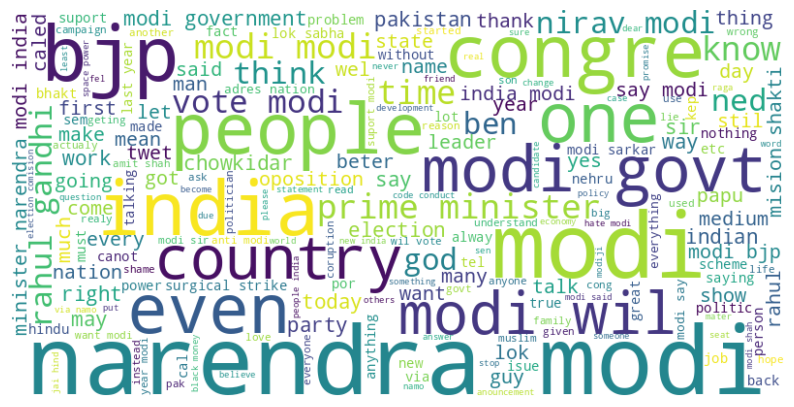

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(textPro))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
X = textPro.values
Y = data['category'].values


In [ ]:
print(X)

['modi promised minimum government maximum governance expected begin dificult job reforming state take year get justice state busines exit psus temple'
 'talk nonsense continue drama wil vote modi'
 'say vote modi welcome bjp told rahul main campaigner modi think modi relax'
 ... 'cover interaction forum left'
 'big project came india modi dream project hapened reality'
 'ever listen like gurukul discipline maintained even narendra modi maintaining culture indian atack politics someone atack hinduism wil take action proud']


In [ ]:
print(Y)

[-1.  0.  1. ...  0.  0.  1.]


Splitting

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(162980,) (130384,) (32596,)


In [ ]:
Y_train_series = pd.Series(Y_train)

In [ ]:
print(Y_train_series.isnull().sum())

7


In [ ]:
missing_values = Y_train_series[Y_train_series.isnull()]
print(missing_values)

4903     NaN
12208    NaN
45238    NaN
70857    NaN
84915    NaN
101107   NaN
108729   NaN
dtype: float64


In [ ]:
Y_train_series.fillna(0, inplace=True)

In [ ]:
print(Y_train_series.isnull().sum())

0


In [ ]:
print(X_train)

['narative set game changer name changer modi busy changing name scheme uplift anounces scheme uplift por'
 'desh kese surakshit hoga jab chowkidar chor hai try many spech want mrmodi ideology act came transparent citizen wait watch'
 'top trending today india rowling dragon bal super british french handwara keler row modis mision shakt'
 ...
 'kind person make castle stone thrown oposition fals trap bound take advantage view'
 'trying control judiciary parliament ordered emergency jailed political leader stabed father law say live interview'
 'modilive huge crowd']


In [ ]:
print(X_test)

['videothen going change fact modi betrayed people also video mon landing mean never hapened least talk sense'
 'dinesh dubey former alahabad bank director whistleblower aleged crore nirav modipnb sca confirmed mail warning authority upa iregularities loan given mehul choksi uncle nirav modi'
 'papu nehru given credit isro achievementwhy modif achievement scientisthen told coward nehru policy make self relient defenceis scientistif scientisthow give credit nehrujust dynast fol'
 ...
 'modi friday expresed confidence bjp wil return power absolute majority aprilmay election saying people made mind ensure victory national democratic aliance plus seat'
 'modi developmentcompete'
 'shameles modi govt using armed force win vote nothing giving neither nfu orop rationsif anybody insulting armed force gave worst pay com opened cant suport land mafia continualy downgraded']


converting text to numerical

In [ ]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train)

  (0, 54775)	0.14712332378723975
  (0, 2978)	0.21074370611900722
  (0, 74364)	0.5524716197456956
  (0, 62675)	0.3045035689938657
  (0, 11690)	0.23117353376099695
  (0, 10221)	0.20176049042665523
  (0, 44860)	0.034903315518972244
  (0, 47419)	0.30897711418427515
  (0, 11681)	0.48414682152453165
  (0, 26438)	0.1943467847029208
  (0, 63719)	0.18264648287871407
  (0, 47579)	0.19907875782549272
  (1, 76507)	0.17410006791172594
  (1, 76228)	0.20578277939826323
  (1, 13053)	0.19107124118921837
  (1, 72353)	0.3018539491017194
  (1, 10493)	0.19306333103377749
  (1, 627)	0.2040891181061211
  (1, 32009)	0.2304652066176226
  (1, 46428)	0.23698601828609384
  (1, 76338)	0.13776252666971808
  (1, 66552)	0.18228756904264715
  (1, 42702)	0.1580406683623513
  (1, 72727)	0.19745289313171094
  (1, 29050)	0.1564405278464781
  :	:
  (130381, 71336)	0.29872176221347996
  (130381, 75493)	0.25199976076780156
  (130381, 50590)	0.18632339132139025
  (130381, 53149)	0.20846741117900555
  (130381, 69312)	0.1771427

In [ ]:
print(X_test)

  (0, 75437)	0.2357111382787267
  (0, 69390)	0.22712432137313524
  (0, 63545)	0.2739206747547883
  (0, 52887)	0.1424157593280611
  (0, 48521)	0.19594089967315312
  (0, 45831)	0.32811570551944147
  (0, 44860)	0.0485486495648478
  (0, 43361)	0.2224873576247786
  (0, 39893)	0.25225369112138063
  (0, 39398)	0.4116871708383553
  (0, 29412)	0.2447925931491441
  (0, 27685)	0.2045425203995609
  (0, 23806)	0.2300751448274487
  (0, 11662)	0.23451413706635602
  (0, 7291)	0.354299772316861
  (0, 2165)	0.1768914364063314
  (1, 77080)	0.310860792271787
  (1, 76438)	0.2248358655495082
  (1, 74248)	0.13995972217332123
  (1, 73490)	0.2085761375871237
  (1, 48843)	0.2650332715263719
  (1, 44860)	0.031214240080495174
  (1, 43583)	0.19434153816318367
  (1, 41926)	0.26036775532273165
  (1, 40728)	0.15769619764112838
  :	:
  (32595, 75962)	0.09249408995475768
  (32595, 74590)	0.14591355817394616
  (32595, 68526)	0.11500480260047533
  (32595, 64024)	0.16065219828230845
  (32595, 58294)	0.2882436283311748
  (


Training model

Logestic regression

In [53]:
model = LogisticRegression(max_iter=1000000)


In [54]:
model.fit(X_train,Y_train_series)

LogisticRegression(max_iter=1000000)

Model evaluation

Accuracy score

In [55]:
X_train_predection = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_series,X_train_predection)

In [56]:
print('Accuracy score on the training data: ',training_data_accuracy)

Accuracy score on the training data:  0.9093983924407902


In [57]:
X_text_predection = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_predection)

In [58]:
print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the test data:  0.8762731623512088


Model accuacy = 87.6%